In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# 1.1 Reading the dataset and describe the data
df = pd.read_csv('Election_Data.csv')
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [4]:
df.describe()


,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [5]:
# Checking Null Value
print(df.isnull().sum())

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


In [6]:
#Checking duplicate rows
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [7]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
vote
Conservative     462
Labour          1063
Name: count, dtype: int64


GENDER :  2
gender
male      713
female    812
Name: count, dtype: int64




In [8]:
# Checking skewness of numerical variables
print("\nSkewness of Numerical Variables:")
print(df[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].skew())


Skewness of Numerical Variables:
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64


In [9]:
#Checking data types
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [10]:
#shape of the dataset
df.shape

(1525, 10)

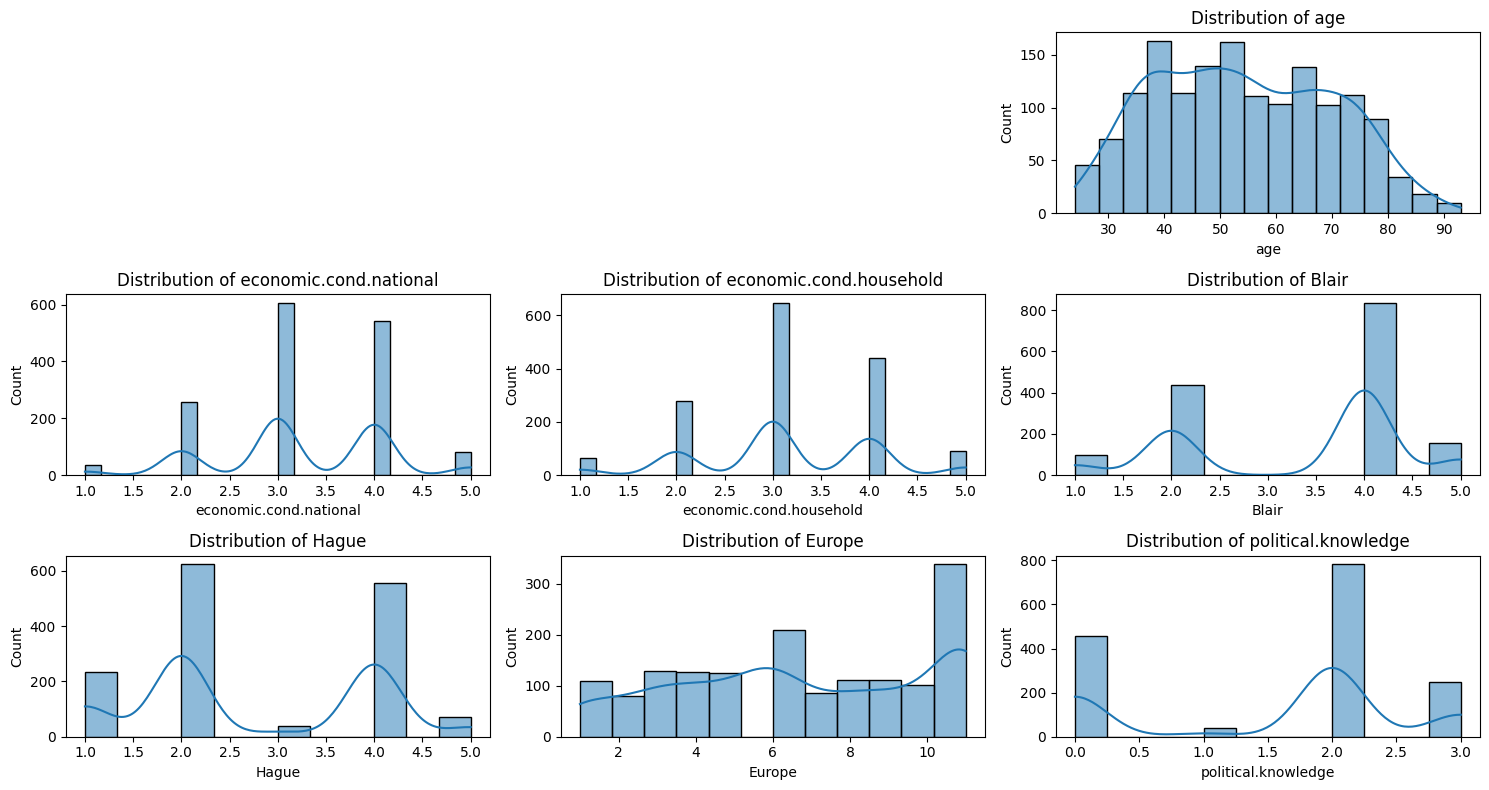

In [11]:
# Univariate Analysis: Distribution plots for continuous variables
plt.figure(figsize=(15, 8))
# Distribution plots for continuous variables
for col in ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']:
    plt.subplot(3, 3, df.columns.get_loc(col) + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

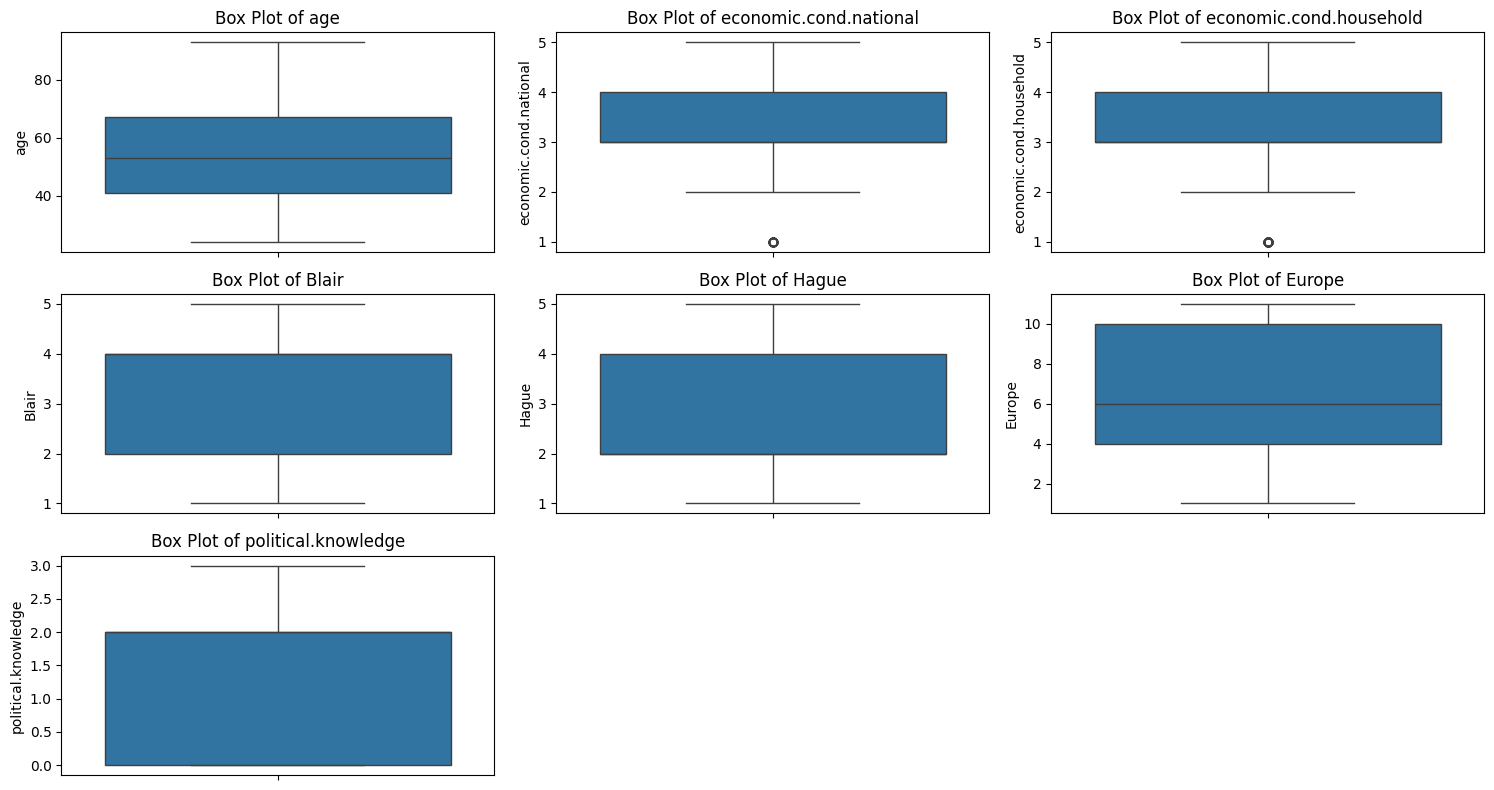

In [12]:
# Box plots for continuous variables to detect outliers
plt.figure(figsize=(15, 8))

for i, col in enumerate(['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

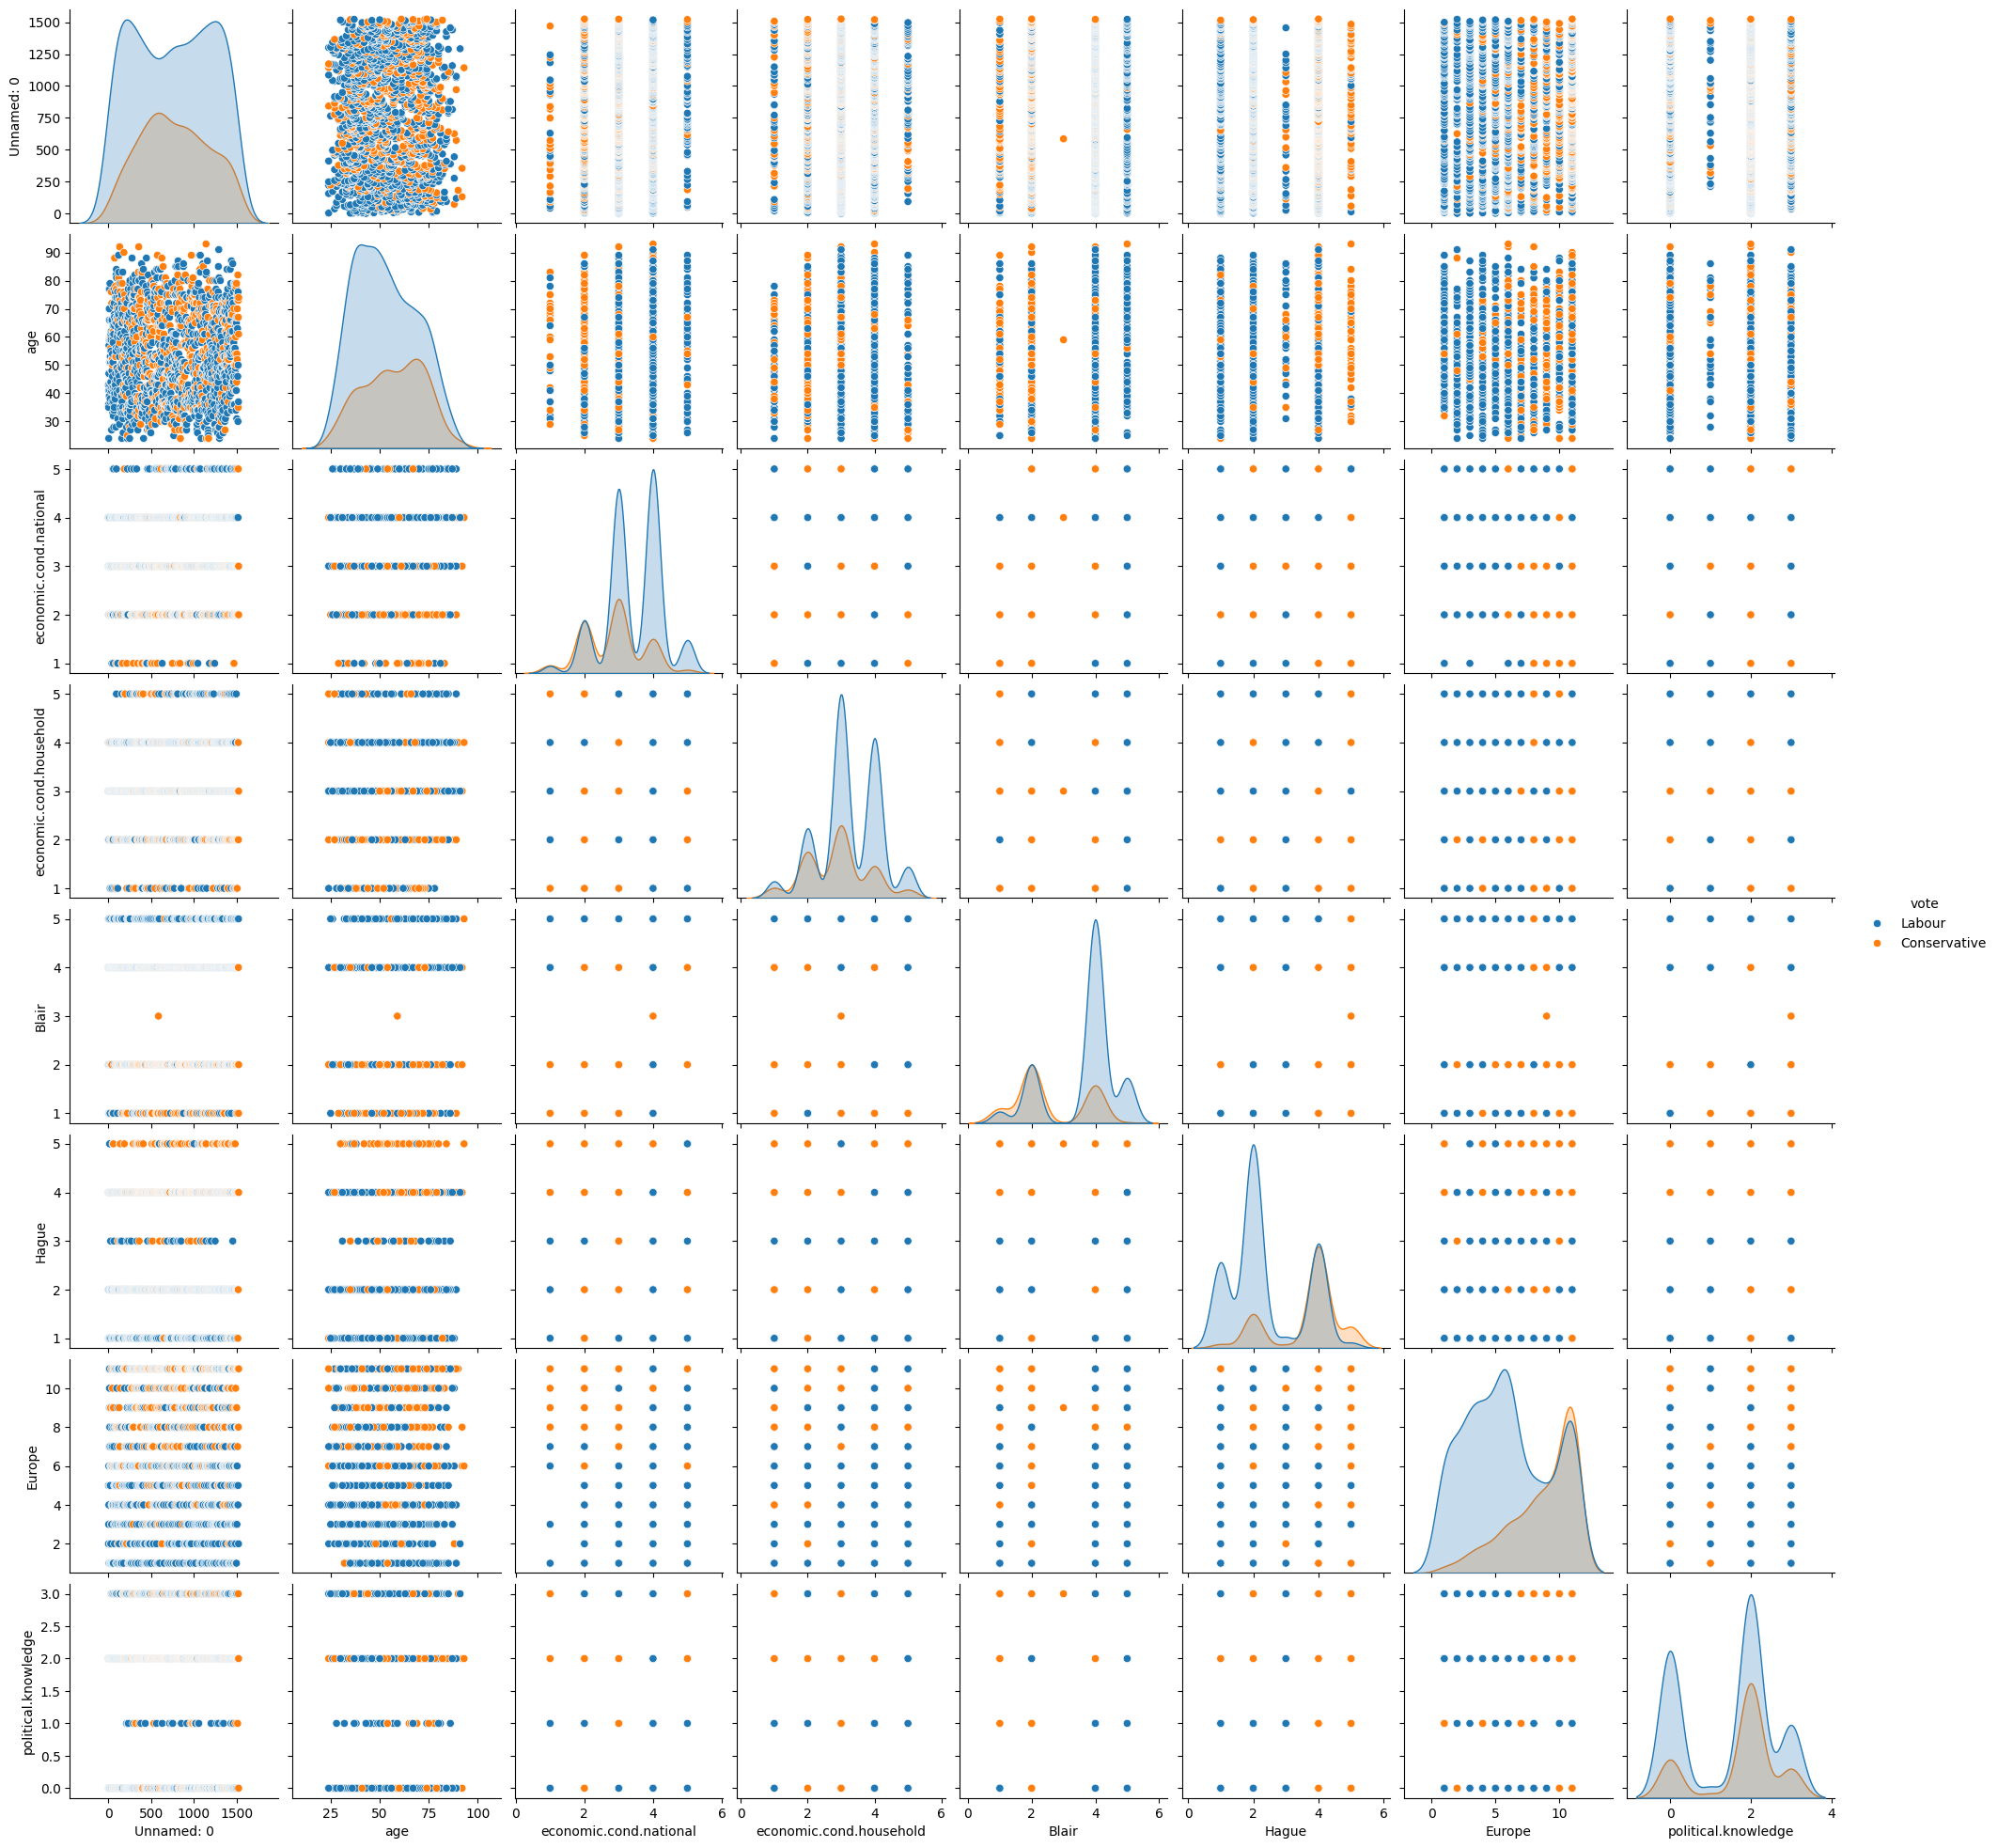

In [13]:
# Bivariate Analysis: Pair plot for relationships between variables
sns.pairplot(df, hue='vote')
plt.show()

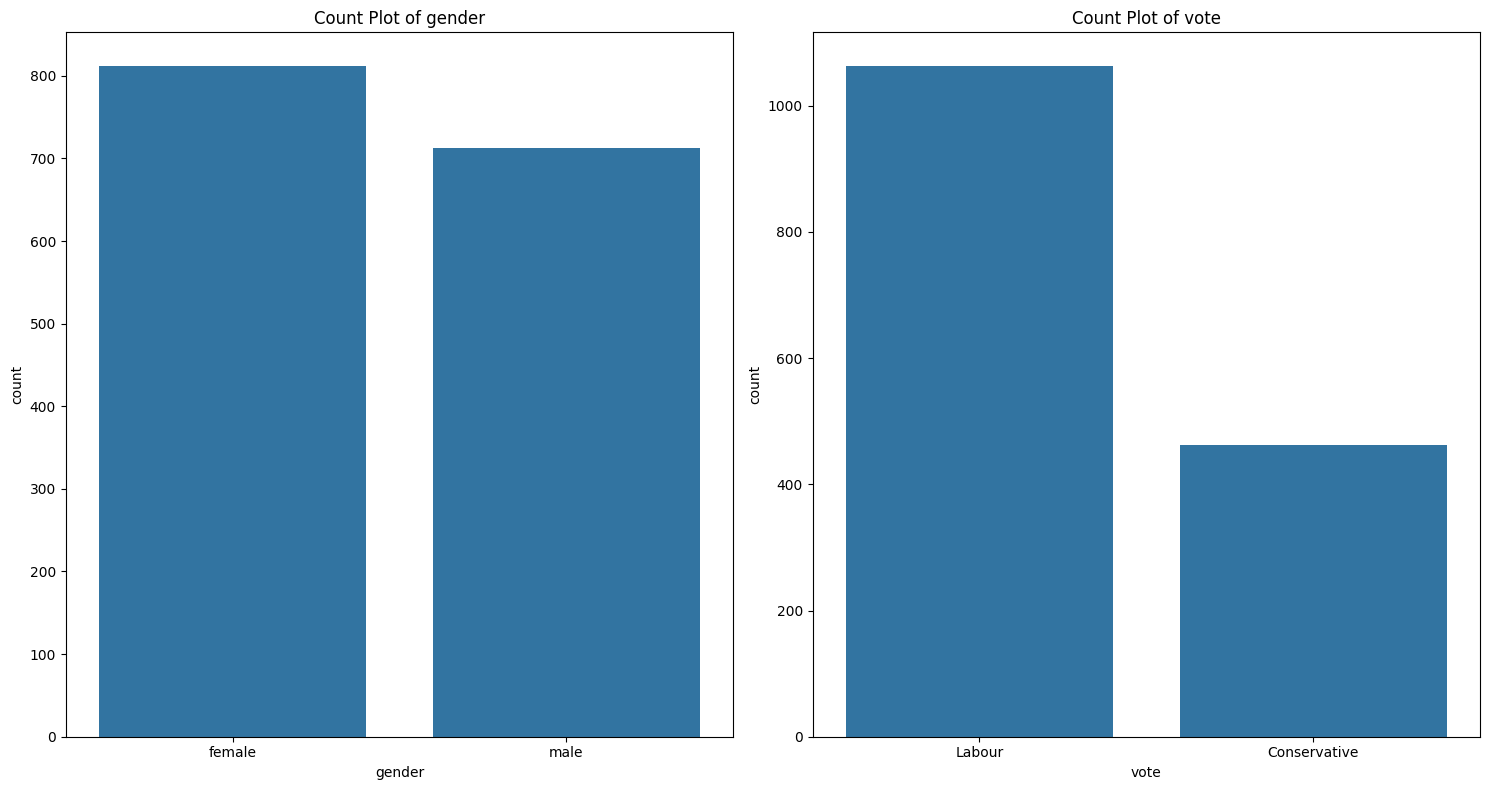

In [14]:
# categorical variables (count plots)
plt.figure(figsize=(15, 8))

for i, col in enumerate(['gender', 'vote']):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

In [115]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['encoded_gender'] = label_encoder.fit_transform(df['gender'])
df['encoded_vote'] = label_encoder.fit_transform(df['vote'])

In [116]:
# Dropping the original categorical columns
df_encoded = df.drop(['gender', 'vote'], axis=1)

In [117]:
# Checking and comment about the difference in scale of different features
print("Difference in Scale of Features:")
print(df_encoded.describe().loc[['std', 'mean', '50%']])

Difference in Scale of Features:
      Unnamed: 0        age  economic.cond.national  economic.cond.household  \
std   440.373894  15.711209                0.880969                 0.929951   
mean  763.000000  54.182295                3.245902                 3.140328   
50%   763.000000  53.000000                3.000000                 3.000000   

         Blair     Hague    Europe  political.knowledge  encoded_gender  \
std   1.174824  1.230703  3.297538             1.083315        0.499109   
mean  3.334426  2.746885  6.728525             1.542295        0.467541   
50%   4.000000  2.000000  6.000000             2.000000        0.000000   

      encoded_vote  
std       0.459685  
mean      0.697049  
50%       1.000000  


In [118]:
# Splitting the data into features (X) and target variable (y)
X = df_encoded.drop('encoded_vote', axis=1)
y = df_encoded['encoded_vote']

In [119]:
#  Splitting the data into train and test (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [120]:
# Standardizing the features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [121]:
# Displaying the shape of the splits
print("\nShape of Train and Test Sets:")
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Shape of Train and Test Sets:
X_train shape: (1067, 9)
X_test shape: (458, 9)
y_train shape: (1067,)
y_test shape: (458,)


In [122]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [123]:
# Predictions on the training set
y_train_logistic = logistic_model.predict(X_train_scaled)
# Predictions on the test set
y_test_logistic = logistic_model.predict(X_test_scaled)

# Train Metrics
print("\nLogistic Regression - Train Metrics:")
print("Train Accuracy:", accuracy_score(y_train, y_train_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_logistic))
print("Classification Report:\n", classification_report(y_train, y_train_logistic))

# Test Metrics
print("\nLogistic Regression - Test Metrics:")
print("Test Accuracy:", accuracy_score(y_test, y_test_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_logistic))
print("Classification Report:\n", classification_report(y_test, y_test_logistic))



Logistic Regression - Train Metrics:
Train Accuracy: 0.8097469540768509
Confusion Matrix:
 [[275  54]
 [149 589]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.84      0.73       329
           1       0.92      0.80      0.85       738

    accuracy                           0.81      1067
   macro avg       0.78      0.82      0.79      1067
weighted avg       0.83      0.81      0.82      1067


Logistic Regression - Test Metrics:
Test Accuracy: 0.7641921397379913
Confusion Matrix:
 [[106  27]
 [ 81 244]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.80      0.66       133
           1       0.90      0.75      0.82       325

    accuracy                           0.76       458
   macro avg       0.73      0.77      0.74       458
weighted avg       0.80      0.76      0.77       458



/Users/issac/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/issac/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [124]:
from sklearn.neighbors import KNeighborsClassifier

# Defining and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (e.g., n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
# Predictions on the training set
y_train_knn = knn_model.predict(X_train_scaled)
# Predictions on the test set
y_test_knn = knn_model.predict(X_test_scaled)

# Train Metrics
print("\nK-Nearest Neighbors (KNN) - Train Metrics:")
print("Train Accuracy:", accuracy_score(y_train, y_train_knn))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_knn))
print("Classification Report:\n", classification_report(y_train, y_train_knn))

# Test Metrics
print("\nK-Nearest Neighbors (KNN) - Test Metrics:")
print("Test Accuracy:", accuracy_score(y_test, y_test_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_knn))
print("Classification Report:\n", classification_report(y_test, y_test_knn))



K-Nearest Neighbors (KNN) - Train Metrics:
Train Accuracy: 0.8837863167760075
Confusion Matrix:
 [[259  70]
 [ 54 684]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       329
           1       0.91      0.93      0.92       738

    accuracy                           0.88      1067
   macro avg       0.87      0.86      0.86      1067
weighted avg       0.88      0.88      0.88      1067


K-Nearest Neighbors (KNN) - Test Metrics:
Test Accuracy: 0.7838427947598253
Confusion Matrix:
 [[ 89  44]
 [ 55 270]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.67      0.64       133
           1       0.86      0.83      0.85       325

    accuracy                           0.78       458
   macro avg       0.74      0.75      0.74       458
weighted avg       0.79      0.78      0.79       458



In [125]:
from sklearn.naive_bayes import GaussianNB

# Defining and training Naïve Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_scaled, y_train)

# Predictions on the training set
y_train_nb = naive_bayes_model.predict(X_train_scaled)
# Predictions on the test set
y_test_nb = naive_bayes_model.predict(X_test_scaled)

# Train Metrics
print("\nNaïve Bayes - Train Metrics:")
print("Train Accuracy:", accuracy_score(y_train, y_train_nb))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_nb))
print("Classification Report:\n", classification_report(y_train, y_train_nb))

# Test Metrics
print("\nNaïve Bayes - Test Metrics:")
print("Test Accuracy:", accuracy_score(y_test, y_test_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_nb))
print("Classification Report:\n", classification_report(y_test, y_test_nb))



Naïve Bayes - Train Metrics:
Train Accuracy: 0.8481724461105904
Confusion Matrix:
 [[243  86]
 [ 76 662]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       329
           1       0.89      0.90      0.89       738

    accuracy                           0.85      1067
   macro avg       0.82      0.82      0.82      1067
weighted avg       0.85      0.85      0.85      1067


Naïve Bayes - Test Metrics:
Test Accuracy: 0.8100436681222707
Confusion Matrix:
 [[ 88  45]
 [ 42 283]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67       133
           1       0.86      0.87      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logreg_grid = GridSearchCV(LogisticRegression(random_state=42), logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid.fit(X_train_scaled, y_train)

# Printing the best hyperparameters for Logistic Regression
print("\nBest Hyperparameters for Logistic Regression:", logreg_grid.best_params_)

# Predictions on the training set
y_train_logreg_grid = logreg_grid.predict(X_train_scaled)
# Predictions on the test set
y_test_logreg_grid = logreg_grid.predict(X_test_scaled)

# Train Metrics
print("\nLogistic Regression - Train Metrics:")
print("Train Accuracy:", accuracy_score(y_train, y_train_logreg_grid))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_logreg_grid))
print("Classification Report:\n", classification_report(y_train, y_train_logreg_grid))

# Test Metrics
print("\nLogistic Regression - Test Metrics:")
print("Test Accuracy:", accuracy_score(y_test, y_test_logreg_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_logreg_grid))
print("Classification Report:\n", classification_report(y_test, y_test_logreg_grid))



Best Hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}

Logistic Regression - Train Metrics:
Train Accuracy: 0.8434864104967198
Confusion Matrix:
 [[227 102]
 [ 65 673]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73       329
           1       0.87      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Logistic Regression - Test Metrics:
Test Accuracy: 0.8209606986899564
Confusion Matrix:
 [[ 82  51]
 [ 31 294]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.62      0.67       133
           1       0.85      0.90      0.88       325

    accuracy                           0.82       458
   macro avg       0.79      0.76      0.77       458
weighted avg       0.82      0.82      0.82       

/Users/issac/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/issac/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/issac/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/issac/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver =

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Linear Discriminant Analysis (LDA)
lda_param_grid = {'solver': ['svd', 'lsqr', 'eigen']}
lda_grid = GridSearchCV(LinearDiscriminantAnalysis(), lda_param_grid, cv=5, scoring='accuracy')
lda_grid.fit(X_train_scaled, y_train)

# Printing the best hyperparameters for LDA
print("\nBest Hyperparameters for Linear Discriminant Analysis:", lda_grid.best_params_)

# Predictions on the training set
y_train_lda_grid = lda_grid.predict(X_train_scaled)
# Predictions on the test set
y_test_lda_grid = lda_grid.predict(X_test_scaled)

# Train Metrics
print("\nLinear Discriminant Analysis - Train Metrics:")
print("Train Accuracy:", accuracy_score(y_train, y_train_lda_grid))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_lda_grid))
print("Classification Report:\n", classification_report(y_train, y_train_lda_grid))

# Test Metrics
print("\nLinear Discriminant Analysis - Test Metrics:")
print("Test Accuracy:", accuracy_score(y_test, y_test_lda_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_lda_grid))
print("Classification Report:\n", classification_report(y_test, y_test_lda_grid))



Best Hyperparameters for Linear Discriminant Analysis: {'solver': 'lsqr'}

Linear Discriminant Analysis - Train Metrics:
Train Accuracy: 0.8434864104967198
Confusion Matrix:
 [[230  99]
 [ 68 670]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73       329
           1       0.87      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067


Linear Discriminant Analysis - Test Metrics:
Test Accuracy: 0.8100436681222707
Confusion Matrix:
 [[ 84  49]
 [ 38 287]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       133
           1       0.85      0.88      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.81      0.8

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors (KNN)
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

# Printing the best hyperparameters for KNN
print("\nBest Hyperparameters for K-Nearest Neighbors (KNN):", knn_grid.best_params_)

# Predictions on the training set
y_train_knn_grid = knn_grid.predict(X_train_scaled)
# Predictions on the test set
y_test_knn_grid = knn_grid.predict(X_test_scaled)

# Train Metrics
print("\nK-Nearest Neighbors (KNN) - Train Metrics:")
print("Train Accuracy:", accuracy_score(y_train, y_train_knn_grid))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_knn_grid))
print("Classification Report:\n", classification_report(y_train, y_train_knn_grid))

# Test Metrics
print("\nK-Nearest Neighbors (KNN) - Test Metrics:")
print("Test Accuracy:", accuracy_score(y_test, y_test_knn_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_knn_grid))
print("Classification Report:\n", classification_report(y_test, y_test_knn_grid))



Best Hyperparameters for K-Nearest Neighbors (KNN): {'n_neighbors': 5, 'weights': 'uniform'}

K-Nearest Neighbors (KNN) - Train Metrics:
Train Accuracy: 0.8837863167760075
Confusion Matrix:
 [[259  70]
 [ 54 684]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       329
           1       0.91      0.93      0.92       738

    accuracy                           0.88      1067
   macro avg       0.87      0.86      0.86      1067
weighted avg       0.88      0.88      0.88      1067


K-Nearest Neighbors (KNN) - Test Metrics:
Test Accuracy: 0.7838427947598253
Confusion Matrix:
 [[ 89  44]
 [ 55 270]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.67      0.64       133
           1       0.86      0.83      0.85       325

    accuracy                           0.78       458
   macro avg       0.74      0.75      0.74       458
weighted avg       

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Naïve Bayes
nb_param_grid = {}  # Naïve Bayes usually doesn't have many hyperparameters to tune
nb_grid = GridSearchCV(GaussianNB(), nb_param_grid, cv=5, scoring='accuracy')
nb_grid.fit(X_train_scaled, y_train)

# Printing the best hyperparameters for Naïve Bayes (there may not be any)
print("\nBest Hyperparameters for Naïve Bayes:", nb_grid.best_params_)

# Predictions on the training set
y_train_nb_grid = nb_grid.predict(X_train_scaled)
# Predictions on the test set
y_test_nb_grid = nb_grid.predict(X_test_scaled)

# Train Metrics
print("\nNaïve Bayes - Train Metrics:")
print("Train Accuracy:", accuracy_score(y_train, y_train_nb_grid))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_nb_grid))
print("Classification Report:\n", classification_report(y_train, y_train_nb_grid))

# Test Metrics
print("\nNaïve Bayes - Test Metrics:")
print("Test Accuracy:", accuracy_score(y_test, y_test_nb_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_nb_grid))
print("Classification Report:\n", classification_report(y_test, y_test_nb_grid))



Best Hyperparameters for Naïve Bayes: {}

Naïve Bayes - Train Metrics:
Train Accuracy: 0.8481724461105904
Confusion Matrix:
 [[243  86]
 [ 76 662]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       329
           1       0.89      0.90      0.89       738

    accuracy                           0.85      1067
   macro avg       0.82      0.82      0.82      1067
weighted avg       0.85      0.85      0.85      1067


Naïve Bayes - Test Metrics:
Test Accuracy: 0.8100436681222707
Confusion Matrix:
 [[ 88  45]
 [ 42 283]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67       133
           1       0.86      0.87      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Defining hyperparameter grid for Random Forest (Bagging)
rf_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]}

# Performing Grid Search for Random Forest (Bagging)
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')

# Fitting the Grid Search model
rf_grid.fit(X_train_scaled, y_train)

# Print the best hyperparameters for Random Forest (Bagging)
print("\nBest Hyperparameters for Random Forest (Bagging):", rf_grid.best_params_)

# Predictions on the training set
y_train_rf_grid = rf_grid.predict(X_train_scaled)
# Predictions on the test set
y_test_rf_grid = rf_grid.predict(X_test_scaled)

# Train Metrics
print("\nRandom Forest (Bagging) - Train Metrics:")
print("Train Accuracy:", accuracy_score(y_train, y_train_rf_grid))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_rf_grid))
print("Classification Report:\n", classification_report(y_train, y_train_rf_grid))

# Test Metrics
print("\nRandom Forest (Bagging) - Test Metrics:")
print("Test Accuracy:", accuracy_score(y_test, y_test_rf_grid))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_rf_grid))
print("Classification Report:\n", classification_report(y_test, y_test_rf_grid))



Best Hyperparameters for Random Forest (Bagging): {'max_depth': None, 'n_estimators': 50}

Random Forest (Bagging) - Train Metrics:
Train Accuracy: 1.0
Confusion Matrix:
 [[329   0]
 [  0 738]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       738

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067


Random Forest (Bagging) - Test Metrics:
Test Accuracy: 0.8122270742358079
Confusion Matrix:
 [[ 86  47]
 [ 39 286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67       133
           1       0.86      0.88      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.77       458
weighted avg       0.81      0.81      0.

In [131]:
# Fitting the AdaBoost model
boosting_rf.fit(X_train_scaled, y_train)

# Displaying performance of AdaBoost model with Random Forest
print("\nBoosting (AdaBoost with Random Forest) Model Performances:")
# Predictions on the training set
y_train_boosting_rf = boosting_rf.predict(X_train_scaled)
# Predictions on the test set
y_test_boosting_rf = boosting_rf.predict(X_test_scaled)
print("AdaBoost (Random Forest) Train Accuracy:", accuracy_score(y_train, y_train_boosting_rf))
print("AdaBoost (Random Forest) Test Accuracy:", accuracy_score(y_test, y_test_boosting_rf))
print("Confusion Matrix (AdaBoost) - Train:\n", confusion_matrix(y_train, y_train_boosting_rf))
print("Classification Report (AdaBoost) - Train:\n", classification_report(y_train, y_train_boosting_rf))
print("Confusion Matrix (AdaBoost) - Test:\n", confusion_matrix(y_test, y_test_boosting_rf))
print("Classification Report (AdaBoost) - Test:\n", classification_report(y_test, y_test_boosting_rf))



Boosting (AdaBoost with Random Forest) Model Performances:
AdaBoost (Random Forest) Train Accuracy: 1.0
AdaBoost (Random Forest) Test Accuracy: 0.8144104803493449
Confusion Matrix (AdaBoost) - Train:
 [[329   0]
 [  0 738]]
Classification Report (AdaBoost) - Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       738

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067

Confusion Matrix (AdaBoost) - Test:
 [[ 88  45]
 [ 40 285]]
Classification Report (AdaBoost) - Test:
               precision    recall  f1-score   support

           0       0.69      0.66      0.67       133
           1       0.86      0.88      0.87       325

    accuracy                           0.81       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.

/Users/issac/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ROC_AUC Score (Train) - Logistic Regression: 0.8954044859597532
ROC_AUC Score (Test) - Logistic Regression: 0.8727588201272412


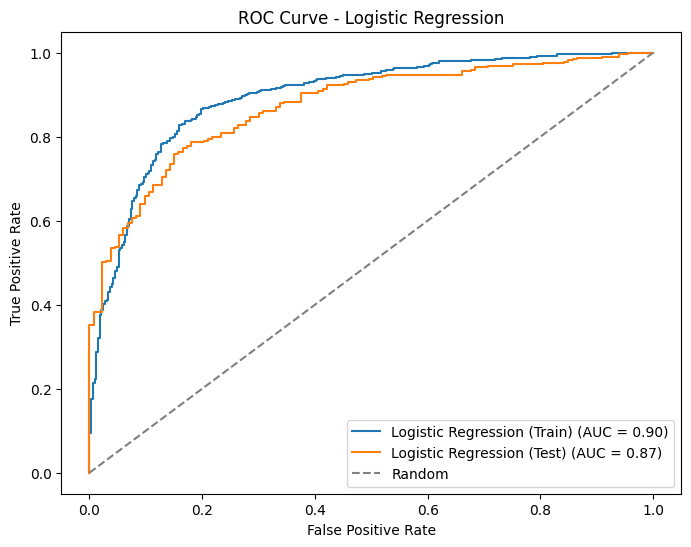

In [132]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# ...

# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, label):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# ...

# Calculating ROC_AUC score for Logistic Regression on the training set
roc_auc_train_logreg = roc_auc_score(y_train, logreg_grid.predict_proba(X_train_scaled)[:, 1])
print(f"ROC_AUC Score (Train) - Logistic Regression: {roc_auc_train_logreg}")

# Calculating ROC_AUC score for Logistic Regression on the test set
roc_auc_test_logreg = roc_auc_score(y_test, logreg_grid.predict_proba(X_test_scaled)[:, 1])
print(f"ROC_AUC Score (Test) - Logistic Regression: {roc_auc_test_logreg}")

# Plotting ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))

# Plotting ROC curve for Logistic Regression
plot_roc_curve(y_train, logreg_grid.predict_proba(X_train_scaled)[:, 1], 'Logistic Regression (Train)')
plot_roc_curve(y_test, logreg_grid.predict_proba(X_test_scaled)[:, 1], 'Logistic Regression (Test)')

# Adding labels and legend
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


ROC_AUC Score (Train) - Linear Discriminant Analysis: 0.8953303514798066
ROC_AUC Score (Test) - Linear Discriminant Analysis: 0.8735916714864085


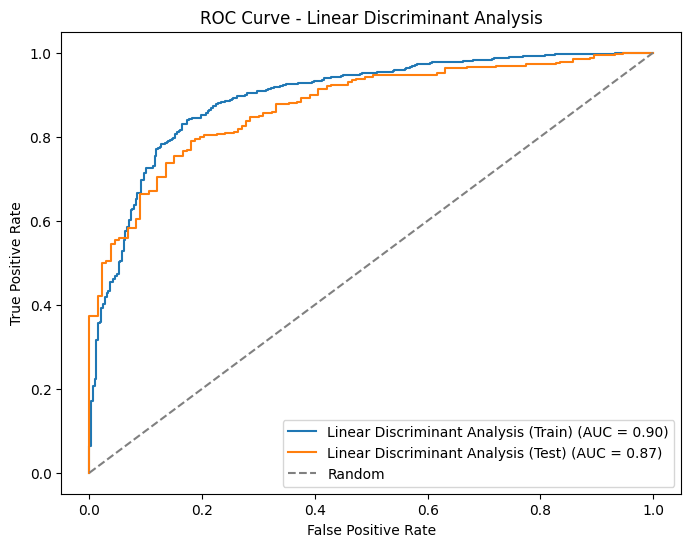

In [133]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# ...

# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, label):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# ...

# Calculating ROC_AUC score for Linear Discriminant Analysis on the training set
roc_auc_train_lda = roc_auc_score(y_train, lda_grid.predict_proba(X_train_scaled)[:, 1])
print(f"ROC_AUC Score (Train) - Linear Discriminant Analysis: {roc_auc_train_lda}")

# Calculating ROC_AUC score for Linear Discriminant Analysis on the test set
roc_auc_test_lda = roc_auc_score(y_test, lda_grid.predict_proba(X_test_scaled)[:, 1])
print(f"ROC_AUC Score (Test) - Linear Discriminant Analysis: {roc_auc_test_lda}")

# Plotting ROC curve for Linear Discriminant Analysis
plt.figure(figsize=(8, 6))

# Plotting ROC curve for Linear Discriminant Analysis
plot_roc_curve(y_train, lda_grid.predict_proba(X_train_scaled)[:, 1], 'Linear Discriminant Analysis (Train)')
plot_roc_curve(y_test, lda_grid.predict_proba(X_test_scaled)[:, 1], 'Linear Discriminant Analysis (Test)')

# Adding labels and legend
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve - Linear Discriminant Analysis')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


ROC_AUC Score (Train) - K-Nearest Neighbors (KNN): 0.9537709738799516
ROC_AUC Score (Test) - K-Nearest Neighbors (KNN): 0.8170965876229035


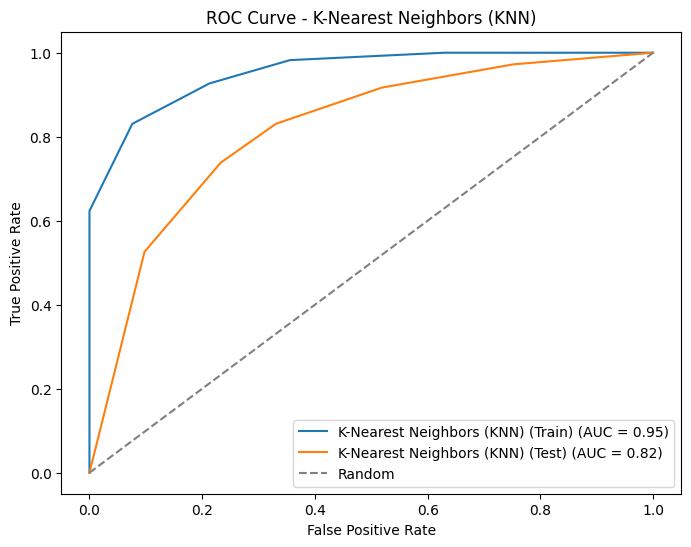

In [134]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# ...

# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, label):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# ...

# Calculating ROC_AUC score for K-Nearest Neighbors (KNN) on the training set
roc_auc_train_knn = roc_auc_score(y_train, knn_grid.predict_proba(X_train_scaled)[:, 1])
print(f"ROC_AUC Score (Train) - K-Nearest Neighbors (KNN): {roc_auc_train_knn}")

# Calculating ROC_AUC score for K-Nearest Neighbors (KNN) on the test set
roc_auc_test_knn = roc_auc_score(y_test, knn_grid.predict_proba(X_test_scaled)[:, 1])
print(f"ROC_AUC Score (Test) - K-Nearest Neighbors (KNN): {roc_auc_test_knn}")

# Plotting ROC curve for K-Nearest Neighbors (KNN)
plt.figure(figsize=(8, 6))

# Plotting ROC curve for K-Nearest Neighbors (KNN)
plot_roc_curve(y_train, knn_grid.predict_proba(X_train_scaled)[:, 1], 'K-Nearest Neighbors (KNN) (Train)')
plot_roc_curve(y_test, knn_grid.predict_proba(X_test_scaled)[:, 1], 'K-Nearest Neighbors (KNN) (Test)')

# Adding labels and legend
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve - K-Nearest Neighbors (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


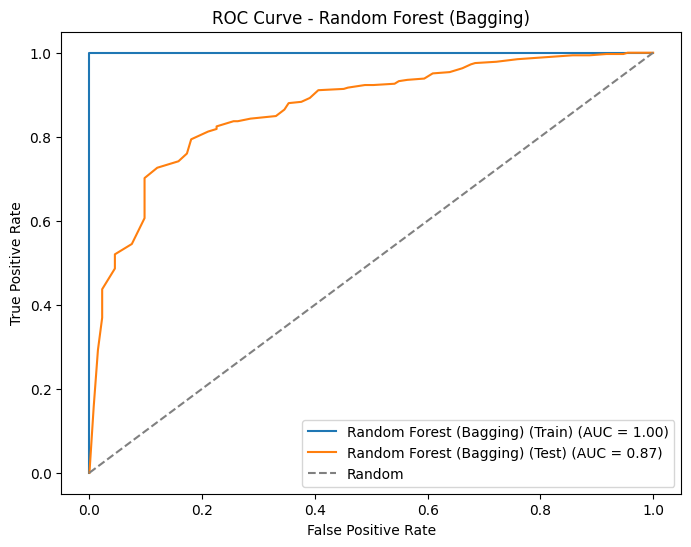

ROC_AUC Score (Train) - Random Forest (Bagging): 1.0
ROC_AUC Score (Test) - Random Forest (Bagging): 0.8686755349913244


In [135]:
# Plotting ROC curve for Random Forest (Bagging)
plt.figure(figsize=(8, 6))

# Plotting ROC curve for Random Forest (Bagging)
plot_roc_curve(y_train, rf_grid.predict_proba(X_train_scaled)[:, 1], 'Random Forest (Bagging) (Train)')
plot_roc_curve(y_test, rf_grid.predict_proba(X_test_scaled)[:, 1], 'Random Forest (Bagging) (Test)')

# Adding labels and legend
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve - Random Forest (Bagging)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
# Calculating ROC_AUC score for Random Forest (Bagging) on the training set
roc_auc_train_rf = roc_auc_score(y_train, rf_grid.predict_proba(X_train_scaled)[:, 1])
print(f"ROC_AUC Score (Train) - Random Forest (Bagging): {roc_auc_train_rf}")
# Calculating ROC_AUC score for Random Forest (Bagging) on the test set
roc_auc_test_rf = roc_auc_score(y_test, rf_grid.predict_proba(X_test_scaled)[:, 1])
print(f"ROC_AUC Score (Test) - Random Forest (Bagging): {roc_auc_test_rf}")


ROC_AUC Score (Train) - Naïve Bayes: 0.8939671007652326
ROC_AUC Score (Test) - Naïve Bayes: 0.8670908039329092


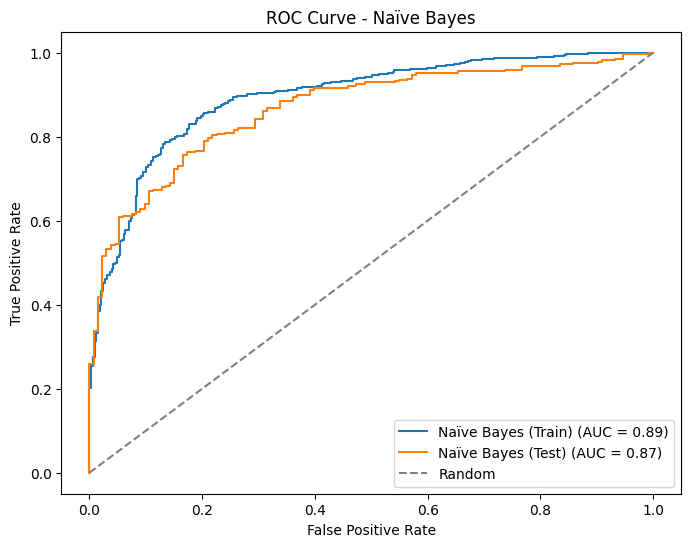

In [136]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# ...

# Calculating ROC_AUC score for Naïve Bayes on the training set
roc_auc_train_nb = roc_auc_score(y_train, nb_grid.predict_proba(X_train_scaled)[:, 1])
print(f"ROC_AUC Score (Train) - Naïve Bayes: {roc_auc_train_nb}")

# Calculating ROC_AUC score for Naïve Bayes on the test set
roc_auc_test_nb = roc_auc_score(y_test, nb_grid.predict_proba(X_test_scaled)[:, 1])
print(f"ROC_AUC Score (Test) - Naïve Bayes: {roc_auc_test_nb}")

# Plotting ROC curve for Naïve Bayes
plt.figure(figsize=(8, 6))

# Plotting ROC curve for Naïve Bayes
plot_roc_curve(y_train, nb_grid.predict_proba(X_train_scaled)[:, 1], 'Naïve Bayes (Train)')
plot_roc_curve(y_test, nb_grid.predict_proba(X_test_scaled)[:, 1], 'Naïve Bayes (Test)')

# Adding labels and legend
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve - Naïve Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


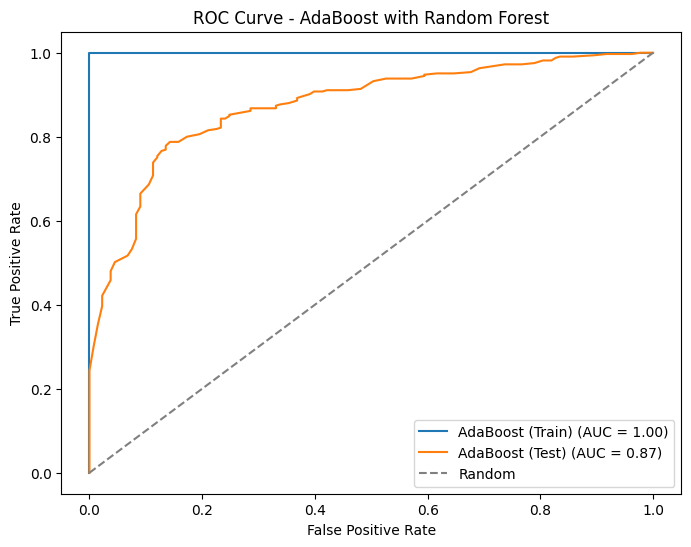

ROC_AUC Score (Train) - AdaBoost with Random Forest: 1.0
ROC_AUC Score (Test) - AdaBoost with Random Forest: 0.8746211683053788


In [137]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# ...

# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, label):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# ...

# Plotting ROC curve for AdaBoost with Random Forest
plt.figure(figsize=(8, 6))

# Plotting ROC curve for AdaBoost with Random Forest
plot_roc_curve(y_train, boosting_rf.predict_proba(X_train_scaled)[:, 1], 'AdaBoost (Train)')
plot_roc_curve(y_test, boosting_rf.predict_proba(X_test_scaled)[:, 1], 'AdaBoost (Test)')

# Adding labels and legend
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve - AdaBoost with Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
# Calculating ROC_AUC score for AdaBoost with Random Forest on the training set
roc_auc_train_boosting_rf = roc_auc_score(y_train, boosting_rf.predict_proba(X_train_scaled)[:, 1])
print(f"ROC_AUC Score (Train) - AdaBoost with Random Forest: {roc_auc_train_boosting_rf}")

# Calculating ROC_AUC score for AdaBoost with Random Forest on the test set
roc_auc_test_boosting_rf = roc_auc_score(y_test, boosting_rf.predict_proba(X_test_scaled)[:, 1])
print(f"ROC_AUC Score (Test) - AdaBoost with Random Forest: {roc_auc_test_boosting_rf}")

